## make adjacency matrix to export

In [227]:
from pathlib import Path
import os, re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

btw, pathlib.Path is amazing, just started playing with it, fully object-oriented path manipulation

### set up paths, etc

In [228]:
%pwd

'/Users/alex/Dropbox/NeuroData/ndmg-top/exploration/aloftus'

In [229]:
%ls

BNU1_output_Y.csv             discrim-02-05/
BNU1_output_desikan.csv       discrim-graph-new.ipynb
HNU1_X.csv                    discrim-graph.ipynb
HNU1_Y.csv                    discrim_graph.py
KKI2009_output_Y.csv          env/
KKI2009_output_desikan.csv    output-explanation-master.md
NKI_output_Y.csv              output-explanation-merge.md
NKI_output_desikan.csv        pr-diff.ipynb
README.md                     run_data.py
current-dev.ipynb


In [230]:
p = Path('discrim-02-05/NKI_desikan')

In [231]:
# making sure I know what iterdir() does
[i for i in p.iterdir()][:5]

[PosixPath('discrim-02-05/NKI_desikan/sub-8735778_ses-1_dwi_desikan_res-1x1x1_measure-spatial-ds_elist.csv'),
 PosixPath('discrim-02-05/NKI_desikan/sub-0021006_ses-1_dwi_desikan_res-1x1x1_measure-spatial-ds_elist.csv'),
 PosixPath('discrim-02-05/NKI_desikan/sub-8735778_ses-2_dwi_desikan_res-1x1x1_measure-spatial-ds_elist.csv'),
 PosixPath('discrim-02-05/NKI_desikan/sub-0021006_ses-2_dwi_desikan_res-1x1x1_measure-spatial-ds_elist.csv'),
 PosixPath('discrim-02-05/NKI_desikan/sub-2799329_ses-1_dwi_desikan_res-1x1x1_measure-spatial-ds_elist.csv')]

In [232]:
num_subj = len([i for i in p.iterdir()])
num_subj

16

### grab graphs

In [233]:
[i for i in p.iterdir()][0]

PosixPath('discrim-02-05/NKI_desikan/sub-8735778_ses-1_dwi_desikan_res-1x1x1_measure-spatial-ds_elist.csv')

In [234]:
# list of numpy matrices
graphs = [nx.read_weighted_edgelist(str(i), delimiter=',') 
          for i in p.iterdir()]

### check nodelists, output sorted version to numpy matrix

In [220]:
len(graphs)

16

In [221]:
nx.to_numpy_array(graphs[0]).shape

(70, 70)

In [222]:
graphs[0].nodes()

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '70', '69', '58'))

In [223]:
graphs[1].nodes()

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70'))

check the below list comprehension, because I'm not 100% confident it's right with edgelist sorting

In [224]:
# PROBLEM HERE
graphs = [nx.to_numpy_array(g, nodelist=sorted(list(graphs[i].nodes())))
          for i, g in enumerate(graphs)]

In [235]:
sorted(list(graphs[0].nodes()))

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '8',
 '9']

### remove diagonals

In [199]:
for i, _ in enumerate(graphs):
    np.fill_diagonal(graphs[i], 0)

In [200]:
graphs[0]  # cool beans

array([[    0.,  2451., 21647., ...,  5211.,  6505.,  9163.],
       [ 2451.,     0.,  1143., ...,     0.,  9946.,  1351.],
       [21647.,  1143.,     0., ...,  4631.,  2463.,  3447.],
       ...,
       [ 5211.,     0.,  4631., ...,     0.,   154.,  1585.],
       [ 6505.,  9946.,  2463., ...,   154.,     0.,   580.],
       [ 9163.,  1351.,  3447., ...,  1585.,   580.,     0.]])

don't have to worry about nodelists getting removed here, cause networkx fills them in

### consider LCC

graphs is currently a list of numpy arrays, where each element is the per-subject adjacency matrix

In [201]:
# assert size of all matrices is 70x70
# problem: not all of these are 70x70
print(all(x.shape == (70, 70) for x in graphs), '\n')

for i, _ in enumerate(graphs):
    print(i, graphs[i].shape)
    
len(graphs)

True 

0 (70, 70)
1 (70, 70)
2 (70, 70)
3 (70, 70)
4 (70, 70)
5 (70, 70)
6 (70, 70)
7 (70, 70)
8 (70, 70)
9 (70, 70)
10 (70, 70)
11 (70, 70)
12 (70, 70)
13 (70, 70)
14 (70, 70)
15 (70, 70)


16

### make single output graph

In [202]:
# for each element of graphs, flatten that element
# then, append that element as a row in the final output matrix

# no reason to keep using lists
graphs = np.array(graphs)

In [203]:
graphs.shape

(16, 70, 70)

In [204]:
graphs_final = np.reshape(graphs, (num_subj, 70*70))

In [205]:
graphs.shape

(16, 70, 70)

In [206]:
graphs_final.shape

(16, 4900)

In [207]:
check = np.reshape(graphs_final, (num_subj, 70, 70))

reshaping preserves information

In [208]:
np.all(check == graphs)

True

flattening is the same as reshaping on a single dimension basis

In [209]:
np.all(graphs[0].flatten() == graphs_final[0])

True

In [210]:
np.all(np.reshape(graphs_final[0], (70, 70)) == graphs[0, :, :])

True

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


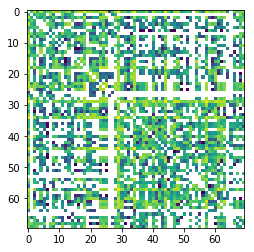

In [211]:
plt.imshow(np.log10(graphs[0]) + 1)

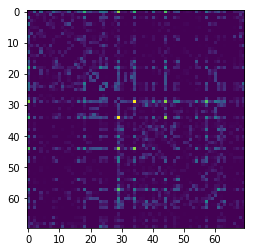

In [212]:
plt.imshow(graphs[0])

### save as csv

In [181]:
np.savetxt('NKI_output_desikan.csv', graphs_final, fmt='%f', delimiter=",")

### get Y vector, save as csv

In [182]:
from collections import Counter

In [183]:
Y = [str(i) for i in p.iterdir()]

rgx = r'(sub-)([a-zA-Z0-9]*)'
Y = [re.findall(rgx, Y[i])[0][1] for i, _ in enumerate(Y)]
Y[:5]

['8735778', '0021006', '8735778', '0021006', '2799329']

In [184]:
# Check to make sure each subj has duplicates
Counter(Y)

Counter({'8735778': 2,
         '0021006': 2,
         '2799329': 2,
         '4176156': 1,
         '1961098': 1,
         '0021024': 1,
         '0021002': 1,
         '3201815': 1,
         '2475376': 2,
         '0021018': 2,
         '1427581': 1})

make Y vector file

In [185]:
for i in Y:
    with open("NKI_output_Y.csv", "a") as f:
        f.write(i + '\n')

Potential thing I'm worried about: making sure order of subjects was preserved across this whole thing, otherwise the Y vector won't be the correct order